# Block C: Responsible AI 

For details regarding ILO 3.1 and the use-case, please refer to the Assessment rubric in Microsoft Teams, and the [DataLab: Responsible AI](https://adsai.buas.nl/Study%20Content/Responsible%20and%20Explainable%20AI/UseCases.html) GitHub page.

## Use-case 1: Identifying, and describing bias

1. Bias is the average error of an ML model after training on a set that occurs when the algorithm gives prejudiced outputs. Usually, it happens because of biased or non-representative data, also biases can arise because of poor evaluation of the model. When a bias is present model can prioritise one feature over different ones which can result in inaccurate and biased predictions/classifications/outputs
2. Biases in the dataset:
    1. **Privilege** - by looking at the dataset we can spot a privilege of male pictures over female ones. There are 24 thousand of pictures of men and only 18 thousand pictures of women. Male pictures take 57% of the data set which makes this data set not a fair representation of the real world situation as the population is almost equally split with a small advantage towards men.
    2. **Feminist Theory** - in this data set there is a prejudice of social roles. If we look at every day home chores for example washing we will see that there is an outweigh of women (60% of images are female agents) doing this task. Meanwhile, if we look at the images related to physical work e.g. carrying we will spot a majority of male pictures. This is a "traditional" representation of social roles that now can be considered as biased as the roles have shifted.
    3. **Privilege** - "driving" class has 211 images and 75% of images are people driving cars which makes this category non-representative of all other vehicles such as trains, buses, boats, etc.
3. After exploring the data set I can conclude that for some categories in different classes, data can be non-representative and prioritise one category over another, also data is shifted toward the male population. All these factors can result in poor output and biased predictions after modelling, so while building the model we should keep in mind that our data can be biased and unfair. For example, if we build a model that classifies who is doing home chores, the model can misclassify a man with long hair. The model is mostly trained on female images, so it will associate long hair with a woman, as it is common for women rather than men to have long hair.

## Use-case 2: Propose individual fairness method

1. By looking at the "driving" class we can see that this data set is non-representative for any type of vehicle besides cars. The ratio in the data set is 75% - cars, 4% - trains, 3% - boats, 2% - buses, 2% - tractors, and 15% - other. The real-world ratio is 76% - cars, 68% - busses, and 21% - trains. The sum of all the ratios for the real-world situation is over 100% as data overlap and people can be able to drive a car bus or train at the same time. As we can see there is a big miss representation in the data set compared to the real world, which can result in biased outputs and misclassifications.
2. I would approach this problem by using the 'Fairness Through Awareness' method: I would scrape the images of people driving different vehicles to make the ratio of images balanced and bring it closer to the real world situation.
3. I believe that the 'Fairness Through Awareness' method is the best one in this case. There are only ≈10 images of each vehicle besides cars, it would be better to add new images to the set, as decreasing the number of images for each category to improve the ratio will make the amount of data insufficient to create an accurate classification model.

## Use-case 3: Create a subset of images from the original dataset

Write your text for use-case 3 here

In [1]:
# Function to get codes for nouns
import json
import shutil

import numpy as np
import pandas as pd


imsitu_space = json.load(open("imsitu_space.json"))

nouns = imsitu_space["nouns"]
verbs = imsitu_space["verbs"]

def get_agent_codes(agent = "person"):

    codes = []

    for noun in nouns:
        if nouns[noun]['gloss'][0] == agent:

            codes.append(noun)

    return codes


meat_agent_code = get_agent_codes('meat')

meat_agent_code


['n07649854']

In [2]:
def get_verb_agent(json_file,verb_custom,agent_custom, key_of_the_agent):

    train = json.load(open(json_file))
    verb_value, agent_key, agent_value, file_path = [],[],[],[]
    count = 0
    for key_a in key_of_the_agent:
        for path in train:
            verb = train[path]['verb']
            if verb == verb_custom:
                frames = train[path]['frames']
                for frame in frames:
                    for key, value in frame.items():
                        if key == key_a:
                            if value in agent_custom:
                                if path not in file_path:
                                    agent_key.append(key)
                                    agent_value.append(value)
                                    file_path.append(path)
                                    verb_value.append(verb)
                                    count += 1
                                else:
                                    continue
                            else:
                                continue
    return file_path, verb_value, agent_key, agent_value, count

In [3]:
def img_to_folder(dir_orig, dir_dest, file_path, verb_list, agents, key_of_the_agent, f_class):

    image_2d_arr = [get_verb_agent(file_path, verb_list[i], agents, [key_of_the_agent[i]])[0] for i in range(len(verb_list))]
    print(image_2d_arr)
    dirs_list = [(dir_orig,dir_dest)]

    for img_array in image_2d_arr:
        for img in img_array:
            for source_folder, destination_folder in dirs_list:
                shutil.copy(source_folder + '/' + img, destination_folder + f_class + '/' + img)

In [4]:
def lists_to_df(dir_dist, file_path, verb, agents, food_class, key_of_the_agent, col1_name = 'file_name', col2_name = 'verb', col3_name = 'agent'):

    col1 = get_verb_agent(file_path,verb,agents, key_of_the_agent)[0]
    col2 = get_verb_agent(file_path,verb,agents, key_of_the_agent)[1]
    col3 = get_verb_agent(file_path,verb,agents, key_of_the_agent)[3]

    df = pd.DataFrame(list(zip(col1, col2, col3)), columns=[col1_name, col2_name, col3_name])
    df.to_csv(dir_dist + food_class + 'description.csv' , index=False)

    return df

In [5]:
IMAGES_DIRECTORY = '/Users/fedor/Documents/uni_img_data_use_case3/of500_images_resized'

SUBSET_DIRECTORY = '/Users/fedor/Desktop/dataset_for_model/imsitu/'

f_classes = ['meat','fish']

agent_codes = [get_agent_codes(agent) for agent in f_classes]

verbs = [['slicing','carving', 'shredding', 'rinsing', 'grinding', 'brushing', 'dripping'],['rinsing', 'scraping', 'barbecuing', 'stuffing', 'chopping', 'grilling']]

key_names = [['sliceditem', 'substance', 'item', 'object', 'item', 'target', 'destination'],['object','scrapeditem','food','destination','item','food']]

for i in range(len(f_classes)):
    img_to_folder(IMAGES_DIRECTORY, SUBSET_DIRECTORY, 'train.json', verbs[i], agent_codes[i], key_names[i], f_classes[i])

[['slicing_5.jpg', 'slicing_23.jpg', 'slicing_196.jpg', 'slicing_120.jpg', 'slicing_185.jpg', 'slicing_231.jpg', 'slicing_124.jpg', 'slicing_175.jpg', 'slicing_234.jpg', 'slicing_140.jpg', 'slicing_189.jpg', 'slicing_224.jpg', 'slicing_232.jpg', 'slicing_210.jpg', 'slicing_65.jpg', 'slicing_221.jpg', 'slicing_229.jpg', 'slicing_18.jpg', 'slicing_162.jpg', 'slicing_128.jpg', 'slicing_83.jpg', 'slicing_138.jpg', 'slicing_61.jpg', 'slicing_53.jpg', 'slicing_59.jpg', 'slicing_97.jpg', 'slicing_106.jpg', 'slicing_131.jpg', 'slicing_35.jpg', 'slicing_123.jpg', 'slicing_76.jpg', 'slicing_71.jpg', 'slicing_222.jpg', 'slicing_22.jpg', 'slicing_55.jpg', 'slicing_178.jpg', 'slicing_161.jpg', 'slicing_126.jpg'], ['carving_156.jpg', 'carving_92.jpg', 'carving_8.jpg', 'carving_41.jpg', 'carving_29.jpg', 'carving_40.jpg'], ['shredding_70.jpg', 'shredding_103.jpg', 'shredding_52.jpg', 'shredding_54.jpg', 'shredding_220.jpg', 'shredding_179.jpg', 'shredding_10.jpg', 'shredding_46.jpg', 'shredding_139.j

## Use-case 4: Write Python functions; group fairness metrics

Write your text for use-case 4 here

In [6]:
#Write your Python code for use-case 4 here

import calculate_metric


matrices = calculate_metric.load_confusion_matrices()

In [7]:
def demographic_parity(matrices):
    proportion_1 = (matrices[0][1] + matrices[0][3]) / sum(matrices[0])
    proportion_2 = (matrices[1][1] + matrices[1][3]) / sum(matrices[1])

    return  proportion_1, proportion_2, abs(proportion_1-proportion_2)

demographic_parity(matrices)

(0.6122448979591837, 0.5102040816326531, 0.10204081632653061)

In [8]:
def selection_parity(matrices):
    number_1 = matrices[0][1] + matrices[0][3]
    number_2 = matrices[1][1] + matrices[1][3]

    return number_2, number_1, abs(number_1-number_2)

selection_parity(matrices)

(50, 60, 10)

In [9]:
def conditional_use_accuracy_equality(matrices):
    precision_pos_1 = matrices[0][3] / (matrices[0][3] + matrices[0][1])
    precision_pos_2 = matrices[1][3] / (matrices[1][3] + matrices[1][1])

    precision_neg_1 = matrices[0][0] / (matrices[0][0] + matrices[0][2])
    precision_neg_2 = matrices[1][0] / (matrices[1][0] + matrices[1][2])

    return  abs(precision_pos_1-precision_pos_2), abs(precision_neg_1-precision_neg_2)

conditional_use_accuracy_equality(matrices)

(0.08333333333333326, 0.02412280701754388)

In [10]:
def equalized_odds(matrices):
    tpr_1 = matrices[0][3] / (matrices[0][3] + matrices[0][2])
    tpr_2 = matrices[1][3] / (matrices[1][3] + matrices[1][2])

    tnr_1 = matrices[0][0] / (matrices[0][0] + matrices[0][1])
    tnr_2 = matrices[1][0] / (matrices[1][0] + matrices[1][1])

    return abs(tpr_1-tpr_2), abs(tnr_1-tnr_2)

equalized_odds(matrices)


(0.04081632653061218, 0.16326530612244894)

In [11]:
def equalized_opportunities(matrices):
    tpr_1 = matrices[0][3] / (matrices[0][3] + matrices[0][2])
    tpr_2 = matrices[1][3] / (matrices[1][3] + matrices[1][2])

    return tpr_2, tpr_1, abs(tpr_1-tpr_2)

equalized_opportunities(matrices)

(0.7142857142857143, 0.7551020408163265, 0.04081632653061218)

In [12]:
def predictive_equality(matrices):
    tnr_1 = matrices[0][0] / (matrices[0][0] + matrices[0][1])
    tnr_2 = matrices[1][0] / (matrices[1][0] + matrices[1][1])

    return  tnr_2, tnr_1, abs(tnr_1-tnr_2)

predictive_equality(matrices)

(0.6938775510204082, 0.5306122448979592, 0.16326530612244894)

In [13]:
def predictive_parity(matrices):
    parity_1 = matrices[0][3] / (matrices[0][3] + matrices[0][1])
    parity_2 = matrices[1][3] / (matrices[1][3] + matrices[1][1])

    return parity_2, parity_1, abs(parity_1-parity_2)


predictive_parity(matrices)

(0.7, 0.6166666666666667, 0.08333333333333326)

In [14]:
def calibaration(matrices):

    true_otcome_prob_1 = (matrices[0][0] + matrices[0][3]) / sum(matrices[0])

    true_otcome_prob_2 = (matrices[1][0] + matrices[1][3]) / sum(matrices[1])

    return true_otcome_prob_1, true_otcome_prob_2

calibaration(matrices)


(0.6428571428571429, 0.7040816326530612)

In [15]:
def cond_statistical_parity(matrices):
    proportion_1 = (matrices[0][1] + matrices[0][3]) / sum(matrices[0])
    proportion_2 = (matrices[1][1] + matrices[1][3]) / sum(matrices[1])

    return abs(proportion_1-proportion_2)

cond_statistical_parity(matrices)

0.10204081632653061

In [16]:
def balance_for_positive(matrices):
    true_outcome_pos = (matrices[0][1] + matrices[0][3]) / sum(matrices[0])

    true_outcome_gen = (matrices[0][1] + matrices[0][3] + matrices[1][0] + matrices[1][3]) / (sum(matrices[0]) + sum(matrices[1]))

    return abs(true_outcome_pos-true_outcome_gen)

balance_for_positive(matrices)

0.04591836734693877

In [17]:
def balance_for_negative(matrices):
    true_outcome_neg = (matrices[1][1] + matrices[1][3]) / sum(matrices[1])

    true_outcome_gen = (matrices[0][1] + matrices[0][3] + matrices[1][0] + matrices[1][3]) / (sum(matrices[0]) + sum(matrices[1]))

    return abs(true_outcome_neg-true_outcome_gen)

balance_for_negative(matrices)

0.14795918367346939

## Use-case 5: Write Python function; group fairness taxonomy

For this use-case I picked a data set with several features that can be used as a sensitive/protected attribute. I decided to use 'Sex' as a sensitive attribute and then evaluate the binary classification model's fairness accordingly to this attribute.

Below you can find a set of functions that represent fairness compass.

Each function is a representation of a decision node in the flowchart.

I decided to make 2 possible ways of inputting data into the functions to make them more universal.

To represent 'Fairness definition' nodes I am using fairness metrics from use-case 4.

In [18]:
def policy(cm,data = []):

    if data == []:
        answer = input('Is there a policy? Yes / No')
    else:
        answer = data.pop()

    if answer == "Yes":
        return type_of_representation(cm,data)
    else:
        return equal_base_rates(cm,data)

def type_of_representation(cm,data = []):

    if data == []:
        answer = input('Type of representation? equal numbers / proportional')
    else:
        answer = data.pop()

    if answer == 'equal numbers':
        return 'Metric: selection parity: ' + str(selection_parity(cm))
    else:
        return 'Metric: demographic parity: ' + str(demographic_parity(cm))

def equal_base_rates(cm,data = []):

    if data == []:
        answer = input('Equal base rates? Yes / No / No, but should be')
    else:
        answer = data.pop()

    if answer == "Yes":
        return demographic_parity(cm)
    elif answer == "No":
        return ground_truth_available(cm,data)
    else:
        return explaining_variables(cm,data)

def ground_truth_available(cm,data = []):

    if data == []:
        answer = input('Ground truth available? Yes / No / Eventually')
    else:
        answer = data.pop()


    if answer == "Yes":
        return ev_metrics_sensitive_to_fairness(cm,data)
    elif answer == "No":
        return  explaining_variables(cm,data)
    else:
        return label_annotation(cm,data)

def label_annotation(cm,data = []):

    if data == []:
        answer = input('Label annotation? Succeeded / Failed')
    else:
        answer = data.pop()


    if answer == 'Succeeded':
        return lable_bias(cm,data)
    else:
        return explaining_variables(cm,data)

def lable_bias(cm,data = []):

    if data == []:
        answer = input('Label bias? Yes / No')
    else:
        answer = data.pop()


    if answer == 'Yes':
        return label_correction(cm,data)
    else:
        return ev_metrics_sensitive_to_fairness(cm,data)

def label_correction(cm,data = []):

    if data == []:
        answer = input('Label correction ? Succeeded / Failed')
    else:
        answer = data.pop()

    if answer == 'Succeeded':
        return ev_metrics_sensitive_to_fairness(cm,data)
    else:
        return explaining_variables(cm,data)

def explaining_variables(cm,data = []):

    if data == []:
        answer = input('Explaining variables? Yes / No')
    else:
        answer = data.pop()

    if answer == 'Yes':
        return 'Metric: conditional statistical parity: ' + str(cond_statistical_parity(cm))
    else:
        return 'Metric: demographic parity: ' + str(demographic_parity(cm))

I decided to split the flowchart into to make code readable.

In [19]:
def ev_metrics_sensitive_to_fairness(cm,data = []):

    if data == []:
        answer = input('Most sensitive evaluation metric? Recall / Precision')
    else:
        answer = data.pop()


    if answer == 'Recall':
        return output_type_r(cm,data)
    else:
        return output_type_p(cm,data)

def output_type_p(cm,data = []):

    if data == []:
        answer = input('Output type? Score / Class label')
    else:
        answer = data.pop()

    if answer == 'Score':
        return 'Metric: calibration: ' + str(calibaration(cm))
    else:
        return sensitive_error_types_p(cm,data)

def sensitive_error_types_p(cm,data = []):

    if data == []:
        answer = input('Most sensitive error types? FP / FN + FP')
    else:
        answer = data.pop()

    if answer == 'FP':
        return 'Metric: predictive parity: ' + str(predictive_parity(cm))
    else:
        return  'Metric: conditional use accuracy equality: ' + str(conditional_use_accuracy_equality(cm))

def output_type_r(cm,data = []):

    if data == []:
        answer = input('Output type? Class label / Score')
    else:
        answer = data.pop()

    if answer == 'Class label':
        return sensitive_error_types_r(cm,data)
    else:
        return which_class_is_sensitive(cm,data)

def sensitive_error_types_r(cm,data = []):

    if data == []:
        answer = input('Most sensitive error types? FN / FN + FP / FP')
    else:
        answer = data.pop()

    if answer == "FN+FP":
        return equalized_odds(cm)
    elif answer == "FN":
        return 'Metric: balance for positive: ' + str(equalized_opportunities(cm))
    else:
        return 'Metric: predictive equality: ' + str(predictive_equality(cm))

def which_class_is_sensitive(cm,data = []):

    if data == []:
        answer = input('Which class is the most sensitive? Positive / Negative')
    else:
        answer = data.pop()

    if answer == 'Positive':
        return 'Metric: balance for positive: ' + str(balance_for_positive(cm))
    else:
        return 'Metric: balance for negative: ' + str(balance_for_negative(cm))


In [20]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Below I defined several functions to preprocess data, train a model, create a matrix for privelleged (sex = 'Male' - 66% of the data) and unprivelleged (sex = 'Female' - 34% of the data) groups.

In [21]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

def get_data_for_matrix():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    column_names = [
        "age", "workclass", "fnlwgt", "education", "education-num",
        "marital-status", "occupation", "relationship", "race",
        "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country",
        "income"
    ]
    data = pd.read_csv(url, header=None, names=column_names)




    X = pd.get_dummies(data.iloc[:,:-1])

    y = data.iloc[:,-1]

    y = y.apply(lambda x:  0 if x == ' <=50K' else 1)

    y = y.to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                        test_size = 0.2,
                                                        random_state = 1)

    model = Sequential()

    model.add(Dense(128,input_shape=(108,),activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))

    model.add(Dense(1))

    model.compile(loss='mean_squared_error',optimizer='adam',metrics = ['mean_squared_error'])

    model.fit(X_train,y_train, epochs = 20, validation_data=(X_test,y_test),verbose=0)

    pred = model.predict(X_test)

    arr_pred = []

    for row in pred:
        arr_pred.append(row[0])

    arr_pred = np.array(arr_pred)

    norm = np.linalg.norm(arr_pred)
    normalized_array = arr_pred/norm
    avg = np.average(normalized_array)

    normalized_array = [1 if x > avg else 0 for x in normalized_array]

    X_test_index = X_test.reset_index()

    pred_with_s = []


    for i in range(len(pred)):
        arr = []

        arr.append(normalized_array[i])
        arr.append(X_test_index.loc[i,'sex_ Female'])
        arr.append(X_test_index.loc[i,'sex_ Male'])
        arr.append(y_test[i])

        pred_with_s.append(arr)


    return pred_with_s

In [22]:

def create_matrix(data):

    cm = [[0, 0, 0, 0], [0, 0, 0, 0]]

    for item in data:

        if item[2]:

            if item[0] == 0 and item[3] == 0:

                cm[0][0] += 1

            elif item[0] == 0 and item[3] == 1:

                cm[0][2] += 1

            elif item[0] == 1 and item[3] == 0:

                cm[0][1] += 1

            elif item[0] == 1 and item[3] == 1:

                cm[0][3] += 1


        elif item[1]:

            if item[0] == 0 and item[3] == 0:

                cm[1][0] += 1

            elif item[0] == 0 and item[3] == 1:

                cm[1][2] += 1

            elif item[0] == 1 and item[3] == 0:

                cm[1][1] += 1

            elif item[0] == 1 and item[3] == 1:

                cm[1][3] += 1

    return  cm

In the last block of code I specify answers to the fairness compas nodes for current data set, and create a matrix to evaluate fairness.

In [23]:
answers = ['No','No, but should be','Yes']
answers = answers[::-1]

cm = create_matrix(get_data_for_matrix())

policy(cm,answers)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-05 23:09:04.470040: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


204/204 [==============================] - 1s 4ms/step


'Metric: conditional statistical parity: 0.04771769709985421'

In [24]:
answers = ['No', 'No', 'Yes', 'Recall', 'Score', 'Positive']
answers = answers[::-1]

policy([[2900, 374, 818, 581], [1776, 167, 141, 75]],answers)

'Metric: balance for positive: 0.2063487817553728'

The measure we are using for this data set is conditional statistical parity. This measure must be equal to 0 to be fair. In this case statistical parity has a close to 0 value -> model is fair.

## Use-case 6: Apply one/multiple explainable AI method(s) to the image classifier

### Load models

In [25]:
from keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

import glob
import cv2

base_line_model = load_model('/Users/fedor/Desktop/best_models_saved/base_line_model_best_acc.hdf5')
tuned_base_line_model = load_model('/Users/fedor/Desktop/best_models_saved/tuned_base_line_moedl_best_acc.hdf5')

### Below I defined functions to preprocess images and apply explainable AI methods

In [26]:
from PIL import Image

def preprocess_image(fpath):

    im = cv2.imread(fpath, 1)
    im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
    im = cv2.resize(im, (128, 128))

    return  im

In [27]:
def decode_predictions(predictions):

    return [['meat','fish','vegetables','fruits'][np.argmax(row)] for row in predictions]

In [28]:
def get_prediction(model, image):

    predict = model.predict(image)

    return [['Meat','Fish','Vegetables','Fruits'][np.argmax(row)] for row in predict][0]

In [29]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [30]:
import matplotlib.cm as cm

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    return(superimposed_img)

In [31]:
from tf_explain.utils.image import apply_grey_patch


def apply_oculus_sens(img_path,patch_size,class_indx,model):

    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128,128))
    img = tf.keras.preprocessing.image.img_to_array(img)

    patches = [
        apply_grey_patch(img,top_left_x,top_left_y,patch_size)
        for index_x, top_left_x in enumerate(range(0, img.shape[0], patch_size))
        for index_y, top_left_y in enumerate(range(0, img.shape[1], patch_size))
    ]



    predictions = model.predict(np.array(patches), batch_size = 16);



    target_class_predicitions = [
        prediction[class_indx] for prediction in predictions
    ]

    coordinates = [
        (index_y, index_x)
        for index_x, _ in enumerate(range(0, img.shape[0], patch_size))
        for index_y, _ in enumerate(range(0, img.shape[1], patch_size))
    ]

    sensetivity_map = np.zeros((img.shape[0] // patch_size, img.shape[1] // patch_size))

    for (index_y, index_x), confidience in zip(coordinates, target_class_predicitions):
        # if index_y < 128 and index_x < 128:
        sensetivity_map[index_y,index_x] = 1 - confidience

    return sensetivity_map

In [32]:
import lime
from lime import lime_image
from lime import submodular_pick

from skimage.segmentation import mark_boundaries

def apply_lime_explainer(img,model):
    explainer = lime_image.LimeImageExplainer(verbose = False)
    exp = explainer.explain_instance(img, 
                                 model.predict, 
                                 top_labels=4, 
                                 hide_color=0, 
                                 num_samples=10000)

    return exp

In [33]:
def visualise_lime(exp, exp_class, weight = 0.1, show_positive = True, hide_background = True):
    image, mask = exp.get_image_and_mask(exp_class, 
                                         positive_only=show_positive, 
                                         num_features=6, 
                                         hide_rest=hide_background,
                                         min_weight=weight)
    return mark_boundaries(image, mask)

### Below I defined a function to visualise explainable AI methods applied to the images from the dataset

In [34]:
def get_images_for_prediction(model,layer_name, row_n, col_n):
    
    image_col_cnt = 0

    predictions = []

    images_to_plot = []

    for fpath in glob.glob('/Users/fedor/Desktop/dataset_for_model/test_data/*.jpg'):

        if 'meat' in fpath:

            index = 0
        elif 'fish' in fpath:

            index = 1

        elif 'vegetables' in fpath:
             
             index = 2

        else:
            index = 3

        im = preprocess_image(fpath)


        with tf.device('/cpu:0'):
            augmented_image = im

        X_predict = []

        

        X_predict.append(augmented_image)

        X_predict = np.array(X_predict)

        if image_col_cnt < row_n:

            predictions.append(get_prediction(model,X_predict))
            

        preprocess_input = keras.applications.xception.preprocess_input
        decode_predictions = keras.applications.xception.decode_predictions

        img_array = preprocess_input(get_img_array(fpath,(128,128)))
        model.layers[-1].activation = None

        heatmap = make_gradcam_heatmap(img_array,model, layer_name)


    

        if image_col_cnt < row_n:
            
            exp = apply_lime_explainer(preprocess_image(fpath),model)

            images_to_plot.append([cv2.resize(augmented_image,(128,128)),cv2.resize(heatmap,(128,128)),cv2.resize(np.array(save_and_display_gradcam(fpath, heatmap)),(128,128)),np.array(apply_oculus_sens(fpath,patch_size=1,class_indx=index,model = model)),cv2.resize(visualise_lime(exp, exp.top_labels[0], show_positive = True, hide_background = False),(128,128))])

    
        image_col_cnt += 1

    return predictions, images_to_plot

In [35]:
def show_images_for_prediction(images,predictions,row_n, col_n):

    fig, ax = plt.subplots(row_n, col_n,
                           sharex = 'col',
                           sharey = 'row')

    fig.set_figheight(15)
    fig.set_figwidth(10)
    fig.tight_layout(pad=0.45)

    image_col_cnt = 0

    titles = ['Input Image', 'Heatmap', 'Grad_cam Image', 'Oculus Sensitivity Image','Lime Explainer Image']

    

    for index_arr, image_arr in enumerate(images):
        for index_img, image in enumerate(image_arr):
                
                
                
                if index_arr == 0:
                    ax[0,index_img].set_title(titles[index_img])
              

        

                ax[index_arr,index_img].imshow(image)
                if index_img != 0:
                    ax[index_arr,index_img].axis('off')

                ax[index_arr,0].set_xlabel('Predicted Class: ' + predictions[index_arr], fontsize = 12)
                ax[image_col_cnt,0].get_xaxis().set_ticks([])
                ax[image_col_cnt,0].get_yaxis().set_ticks([])

    

        image_col_cnt += 1

### Explainable AI methods used

I decided to use 3 different explainable AI methods and apply them to outputs from my model:
1. Grad_cams - an explainable AI method that uses values of activation maps as well as backpropagation to understand the source of prediction. The output of this method is an input image with a heatmap over it that highlights areas that are the most important for the prediction.
2. Oculus Sensitivity - an explainable AI method that changes inputs to trigger different filters in a certain layer of the model to understand the correlation between patterns and filters' triggers. The output of this method is a heatmap that highlights a pattern of pixels that triggered a filter and that lead to a certain output.
3. Lime Explainer - an explainable AI method that tries to understand outputs by perturbating the input data and understanding how these changes affect the predictions. The output of the model is an image with a circled area that positively contributes to the prediction.

### Below I visualised grad_cam, oculus sensitivity, and lime explainer methods applied to the base-line model

In [36]:
%%capture test
preds, images = get_images_for_prediction(base_line_model,'conv2d_4',5,5) 

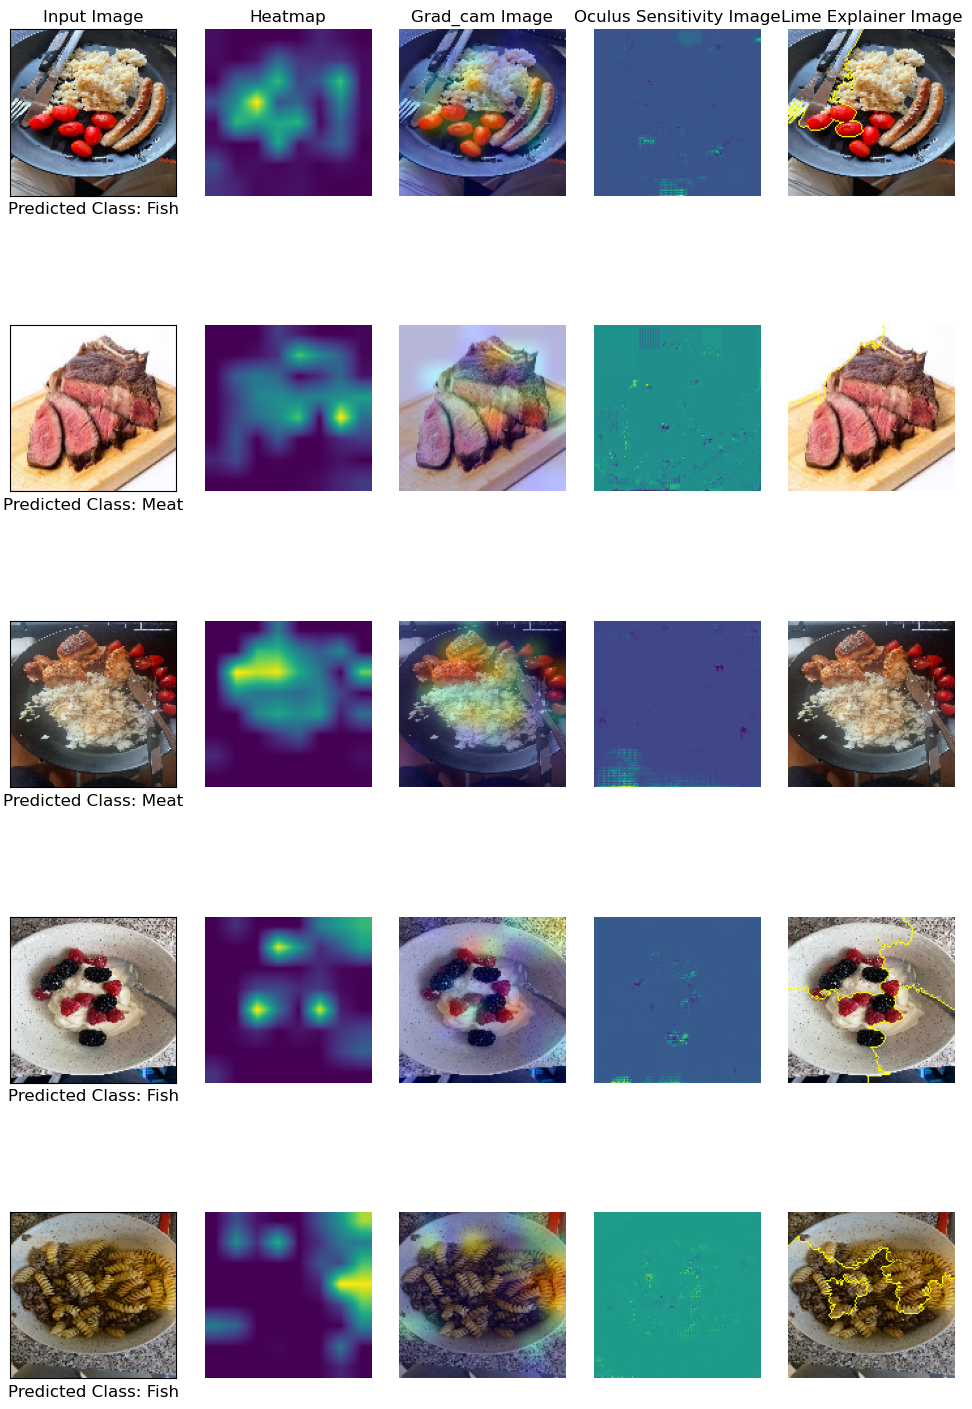

In [37]:
show_images_for_prediction(images,preds,5,5)

### Below I visualised grad_cam, oculus sensitivity, and lime explainer methods applied to the tuned base-line model

In [38]:
%%capture test
preds, images = get_images_for_prediction(tuned_base_line_model,'conv2d_7',5,5) 

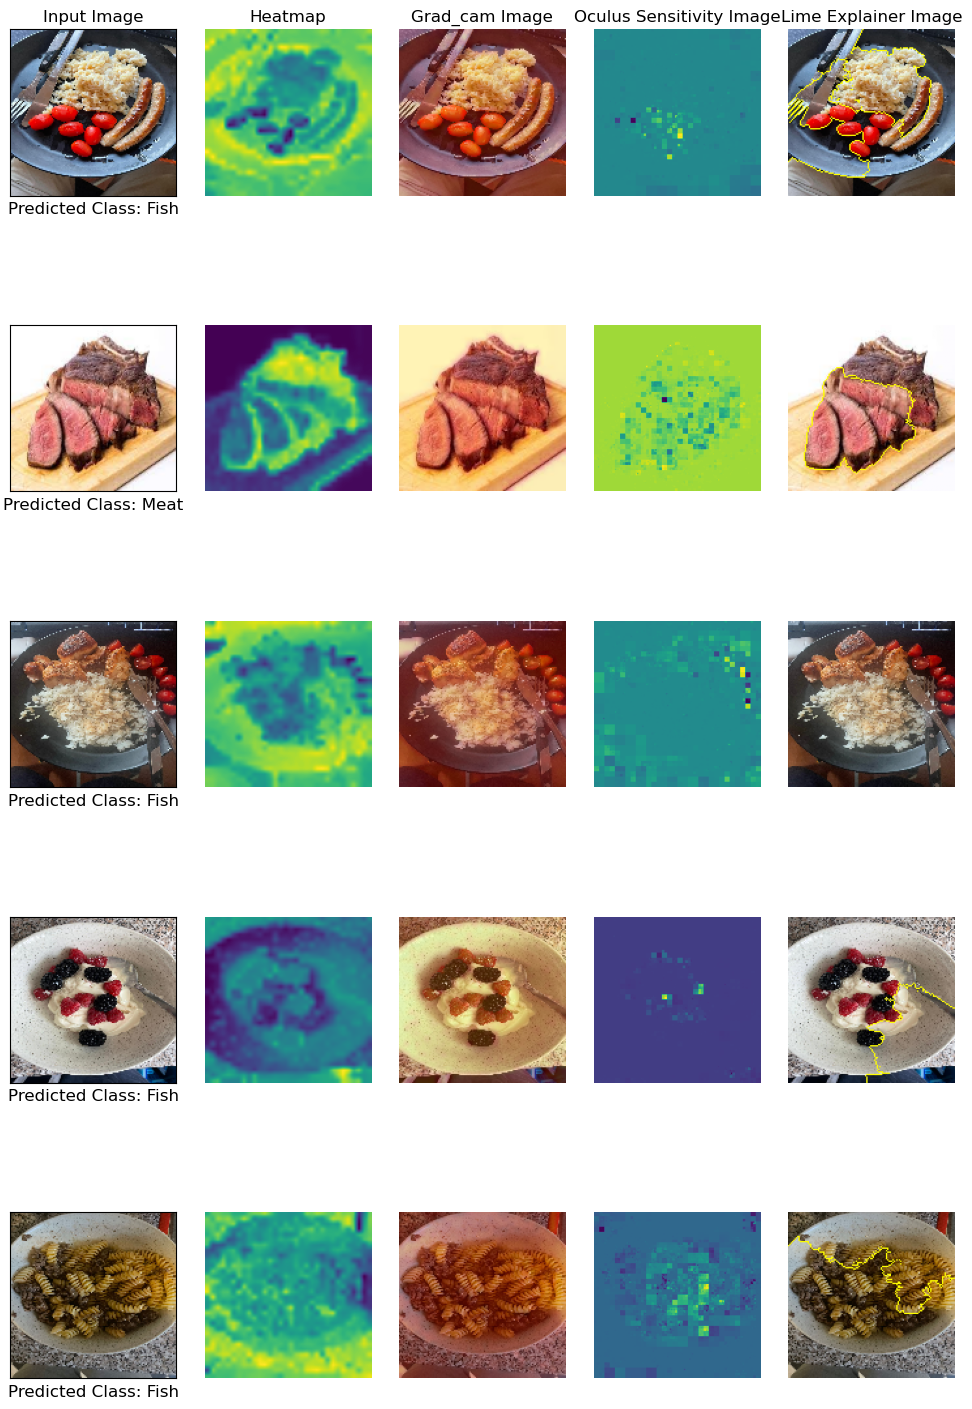

In [39]:

show_images_for_prediction(images,preds,5,5)

### Biases in AI models

There are two most common types of biases related to the AI models:
    1. Biased Dataset
    2. Biased Algorithm

After looking at the visualisations of the explainable AI methods applied to the models' outputs I can conclude that in case with these models there are indeed biases in the AI models that can affect their perforamnce. These biases are mainly biases related to the biased dataset. As the dataset is relatively small it does not have enough images to include all possible food types in all possible representations - unrepresentative / biased dataset. 

As the dataset is biased we can see that sometimes models can look for non-existing patterns or wrong patterns in the images and base their predictions on these patterns that decreases models' accuracy. 